In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

# make sure you have these to make dendrograms!-------
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
#-----------------------------------------------------

%matplotlib inline

# 0. Together

Hierarchical clustering (as the name suggests) assumes that the clusters in the data have a hierarchical relationship. For example, in a McDonald's food dataset we could have clusters like: Dessert, Drinks, Sandwhiches, Other. Within Sandwhiches we could have chicken sandwhiches, Burgers, Vegan Sandwhiches...within Burgers we could have smaller, lower calorie options, and bigger, more substantial burgers...etc.

Blood cells is another great example of a hierarchical relationship: ![blood hierarchy](https://community.jmp.com/t5/image/serverpage/image-id/16820i93FA5BD273E0A842/image-dimensions/340x314?v=1.0)

Hierarchical *Agglomeretive* Clustering (which we perform here), goes bottom up: every datapoint starts as it's own singleton cluster, and at each step, we merge the two closest clusters together until all data points are in one big cluster. In order to decide which clusters are closest, we need to choose two things:

* **distance metric**: this is a measure that helps us define how close together two *data points* are. Euclidean distance is a common distance metric that you may be familiar with, but there is also cosine distance, manhattan distance, hamming distance, and even custom distance functions (like [levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance) between two strings!)
* **linkage criteria**: this is a measure of how close two *clusters* are. Because (most) clusters have more than one point, we need to define what it means for two clusters to be close.
    * **Single Linkage**: the distance between two clusters (A and B) as the minimum distance between any point in A and any point in B ![single linkage](https://community.jmp.com/t5/image/serverpage/image-id/16823iF32133201794C0A4/image-dimensions/251x242?v=1.0)
    * **Average Linkage**: the distance between two clusters (A and B) as the average distance between points in A and points in B. ![average linkage](https://community.jmp.com/t5/image/serverpage/image-id/16824iDD065DCADD44D5EC/image-dimensions/275x307?v=1.0)
    * **Complete Linkage**: the distance between two clusters (A and B) as the maximum distance between any point in A and any point in B. ![complete linkage](https://community.jmp.com/t5/image/serverpage/image-id/16825i39A778742E501081/image-dimensions/277x245?v=1.0)
    * **Centroid Method**: the distance between two clusters (A and B) as the distance between their respective mean vectors (centroids). ![centroid method](https://community.jmp.com/t5/image/serverpage/image-id/16826iFC5E179AEFFF1252/image-dimensions/260x268?v=1.0)
    * **Ward's Method** (default): the distance between two clusters (A and B) as the Sum of Squared Errors when combining the two clusters together. ![ward's method](https://community.jmp.com/t5/image/serverpage/image-id/16827iA35DD99890489DB2/image-dimensions/253x164?v=1.0)
    * and MORE! You could technically define this anyway you wanted.


## 0.1 Dendrograms

### 0.1.1 Diffuse Overlapping Clusters
<img src="https://drive.google.com/uc?export=view&id=1OCGvoe2FtZdIm0NnXbuwDo49E9CDrkIc" width = 600px />

### 0.1.2 Highly Separable Clusters
<img src="https://drive.google.com/uc?export=view&id=1xpYaV-Pa1agH7H-OLzRvCcSWU-k78Uzf" width = 600px />

### 0.1.3 Let's Try on Our Own

#### 1.
<img src="https://drive.google.com/uc?export=view&id=1ilZW8x11EjSAYub7jFM_kN4DxLMsgvOx" width = 500px />

#### 2.
<img src="https://drive.google.com/uc?export=view&id=1bz5MM_HZe30uLLesgCXZkEhfcgmVHG43" width = 500px />

#### 3.
<img src="https://drive.google.com/uc?export=view&id=1b3VHTE0WqmgtVa8ywtJX6sQkvjVadQ6D" width = 500px />


# 1. Linkage Critera

Let's build a few functions that return the distance between two clusters. Each of these functions take in two dataframes, `A` and `B` that contain the datapoints for the two respective clusters (*number of features can vary*).

The functions take in two arguments:

* `A`: an N1 x P dataframe containing the data points in cluster A. (N1 is the number of data points in cluster A; P is the number of features used)
* `B`: an N2 x P dataframe containing the data points in cluster B. (N2 is the number of data points in cluster B; P is the number of features used)


The function should calculate and return the distance between the clusters (assume you're using euclidean distance for all of these) according to their respective linkage criterion (single, average, and complete). Remember a) that you need to calculate the distance between *every* point in `A` and *every* point in `B` and b) [`np.linalg.norm()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).

### *Question*

1. To calculate the distance between two clusters `A` (N1 x P) and `B` (N2 x P), how many distances (between 2 data points) would you have to calculate?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

In [8]:
### YOUR CODE HERE ###

def single(A,B):

    single_dist = []

    for i in range (0, A.shape[0]):
        for j in range (0, B.shape[0]):
            a_i = A.iloc[i]
            b_j = B.iloc[j]

            single_dist.append(np.linalg.norm(a_i - b_j))

    return np.min(single_dist)
    
def average(A,B):
    single_dist = []

    for i in range (0, A.shape[0]):
        for j in range (0, B.shape[0]):
            a_i = A.iloc[i]
            b_j = B.iloc[j]

            single_dist.append(np.linalg.norm(a_i - b_j))

    return np.mean(single_dist)


def complete(A,B):
    single_dist = []

    for i in range (0, A.shape[0]):
        for j in range (0, B.shape[0]):
            a_i = A.iloc[i]
            b_j = B.iloc[j]

            single_dist.append(np.linalg.norm(a_i - b_j))

    return np.max(single_dist)


### /YOUR CODE HERE ###


In [9]:
# check if your functions are working

df = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HAC1.csv")

dA = df.loc[df.cluster == "A"] # cluster A
dB = df.loc[df.cluster == "B"] # cluster B
dC = df.loc[df.cluster == "C"] # cluster C

In [10]:
# if complete() is correct, this will print true
completePASS = abs(complete(dA[["x","y"]], dB[["x","y"]]) - 4.718047025872837) <= 0.01
print("Complete:", completePASS)

# if average() is correct, this will print true
averagePASS = abs(average(dA[["x","y"]], dB[["x","y"]]) - 2.734811240314461) <= 0.01
print("Average:", averagePASS)

# if single() is correct, this will print true
singlePASS = abs(single(dA[["x","y"]], dB[["x","y"]]) - 0.7361237342164363) <= 0.01
print("Single:", singlePASS)
              

Complete: True
Average: True
Single: True


Using the dataset `df` below, 

1. plot the clusters using ggplot, color by cluster
2. use your functions `single()`, `average()`, and `complete()` to calculate the distances between each pair of clusters. 

### *Question*

3. Look at which clusters are considered "close" and "far" in different methods. Are there differences between which are furthest/closest between methods? What are they? 

4. Describe why you think you see these differences.

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

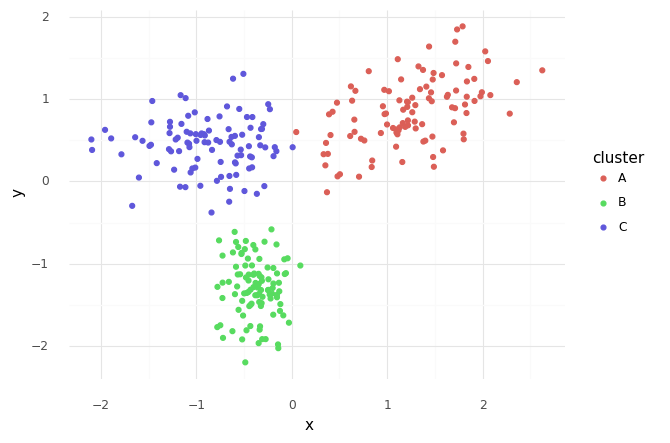

<ggplot: (326872366)>

In [13]:
# plot
(ggplot(df, aes(x = "x", y = "y")) + geom_point(aes(color = "cluster")) + 
theme_bw() + theme_minimal())


In [15]:
# calculate distances (this will likely take a few min to run)

### YOUR CODE HERE ###

#---single------
s_AB = single(dA[['x', 'y']], dB[['x', 'y']])
s_AC = single(dA[['x', 'y']], dC[['x', 'y']])
s_BC = single(dB[['x', 'y']], dC[['x', 'y']])

print("AB:", s_AB)
print("AC:", s_AC)
print("BC:", s_BC)
print("\n")
#---average-----
a_AB = average(dA[['x', 'y']], dB[['x', 'y']])
a_AC = average(dA[['x', 'y']], dC[['x', 'y']])
a_BC = average(dB[['x', 'y']], dC[['x', 'y']])

print("AB:", a_AB)
print("AC:", a_AC)
print("BC:", a_BC)
print("\n")
#---complete----
c_AB = complete(dA[['x', 'y']], dB[['x', 'y']])
c_AC = complete(dA[['x', 'y']], dC[['x', 'y']])
c_BC = complete(dB[['x', 'y']], dC[['x', 'y']])

print("AB:", c_AB)
print("AC:", c_AC)
print("BC:", c_BC)
print("\n")

### /YOUR CODE HERE ###


AB: 0.7361237342164363
AC: 0.18809268564971213
BC: 0.33781439410788666


AB: 2.7348112403144604
AC: 2.22451006115341
BC: 1.8723507863969513


AB: 4.718047025872837
AC: 4.81659588972283
BC: 3.5029348343614792




# 2. Exploring Linkage Critera

Using the predictors listed in `predictors`, perform HAC on the [burger king dataset]("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burger-king-items.txt) using sklearn and the following linkage critera:

* single linkage
* average linkage
* complete linkage
* ward's method

### *Question*
1. Plot and compare the different clusters/dendrograms that you get. What do you notice is similar/different?

2. Think hard: what do the dendrograms tell you about the data?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

(NOTE: see [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) if you need a refresher on how to set linkage criteria in sklearn, and [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) for how to set it for the dendrogram)

In [20]:
burg = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burger-king-items.txt",
                  sep = "\t")

predictors = ["Calories", "Protein(g)", "Fat(g)", "Sodium(mg)", "Carbs(g)", "Sugar(g)"]
z = StandardScaler()
burg[predictors] = z.fit_transform(burg[predictors])
pred = burg[predictors]
burg.head()

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,-0.835829,90.0,-0.370060,-0.919796,4.0,0.0,35,-0.801337,-0.580013,1.0,-0.326804,1,0,1,28
1,Cheeseburger,121.0,-0.661780,130.0,-0.145073,-0.670844,6.0,0.0,45,-0.390175,-0.580013,1.0,-0.326804,1,0,1,28
2,Double_Hamburger,146.0,-0.400706,160.0,0.304900,-0.421892,8.0,0.0,70,-0.745269,-0.580013,1.0,-0.326804,1,0,1,28
3,Double_Cheeseburger,171.0,-0.009095,230.0,0.604882,0.076012,12.0,1.0,95,0.077055,-0.528996,1.0,-0.326804,1,0,1,29
4,Buck_Double,158.0,-0.183144,200.0,0.454891,-0.172940,10.0,0.5,85,-0.334107,-0.580013,1.0,-0.326804,1,0,1,28


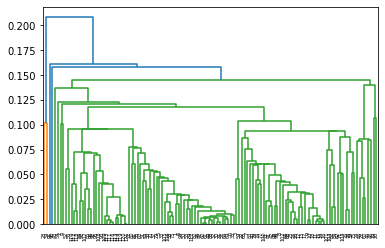

In [24]:
### YOUR CODE HERE ###
hac = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'single')
hac.fit(pred)

dendro = sch.dendrogram(sch.linkage(pred, metric = 'cosine', method = 'single'))
### \YOUR CODE HERE ###

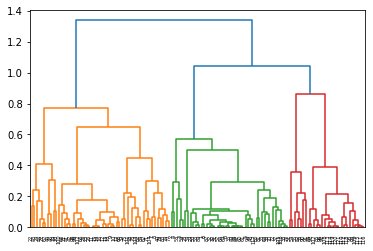

In [25]:
### YOUR CODE HERE ###
hac = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'average')
hac.fit(pred)

dendro = sch.dendrogram(sch.linkage(pred, metric = 'cosine', method = 'average'))
### \YOUR CODE HERE ###

In [ ]:
### YOUR CODE HERE ###
hac = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'complete')
hac.fit(pred)

dendro = sch.dendrogram(sch.linkage(pred, metric = 'cosine', method = 'single'))
### \YOUR CODE HERE ###

In [ ]:
### YOUR CODE HERE ###

### \YOUR CODE HERE ###

# 3. How Linkage Affects Clustering

### **Questions**

1. Generally, how could linkage critera affect the type/shape of clusters that HAC creates?

2. Now that you've built your linkage criteria functions, and have seen how different linkage criteria affect how *close* the HAC algorithm thinks two clusters are, which linkage criteria would especially encourage *cohesive* clusters (remember that density and cohesion are different, cohesion is when all data points are relatively near *all* the data points in it's cluster, density is when data points are relatively near their *closest neighbors* in the cluster). 